Import basic libraries

In [3]:
import torchvision.models as models
from torchsummary import summary
import torch
device = torch.device("cuda")
import pretrainedmodels
from PIL import Image
import requests
import time
import pretrainedmodels.utils as utils
import numpy as np
import matplotlib.pyplot as plt
import cma
from skimage.draw import line_aa
from skimage.draw import circle
import torchvision
from random import randint
print (device)
import torch.nn as nn 

def softmax(x):
    e_x = torch.exp(x - torch.max(x))
    return e_x / e_x.sum()


LABELS_URL = 'https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json'
IMG_URL = 'https://s3.amazonaws.com/mlpipes/pytorch-quick-start/cat.jpg'

labels = {int(key):value for (key, value)
          in requests.get(LABELS_URL).json().items()}

def normalize(input_img):
    return (input_img - torch.min(input_img)) / (torch.max(input_img) - torch.min(input_img))

from torchvision import transforms
transform = transforms.Compose([            #[1]
 transforms.Resize(256),                    #[2]
 transforms.CenterCrop(224),                #[3]
 transforms.ToTensor(),                     #[4]
 transforms.Normalize(                      #[5]
 mean=[0.485, 0.456, 0.406],                #[6]
 std=[0.229, 0.224, 0.225]                  #[7]
 )])

def obtain_gradients(input_img, target_model):
    
    probabilities = softmax(target_model(input_img))
    loss = nn.MSELoss()
    target = torch.rand(1,1000)
    loss_val = loss(target, probabilities)
    print ('Loss: ', loss_val)
    loss_val.backward()
    gradient_wrt_input = input_img + input_img.grad
    return gradient_wrt_input

cuda


Define model parameters

In [ ]:
inception_v3 = models.inception_v3(pretrained=True)
inception_v3.eval()

Run some tests for a sanity check

In [ ]:
initial_input = torch.rand(1,3,224,224, requires_grad=True)
initial_out = softmax(inception_v3(initial_input))
loss = nn.MSELoss()

target = torch.rand(1, 1000)

loss_val = loss(target, initial_out)

print (loss_val)

loss_val.backward()

gradient_wrt_input = initial_input.grad

print (gradient_wrt_input.shape)

input_vector_gradients_visualize = normalize(gradient_wrt_input[0,:,:,:])

plt.imshow( input_vector_gradients_visualize.permute(1, 2, 0))

Experiment 1: Gradient accumulation on an image of an elephant.

In [ ]:
# Change the below to choose the desired neural network model
model = models.vgg19(pretrained=True)
model.eval()

all_grads = torch.zeros(1,3,224,224)

from PIL import Image

# Change the path below to change the input image
img = Image.open("elephant.jpeg")
img_t = transform(img)
img = torch.unsqueeze(img_t, 0)
img = img[:,0:3,:,:]
img.requires_grad_(True)


print (img.shape)

initial_input = torch.zeros(1,3,224,224, requires_grad=True)

RANGE=5

xvals = torch.zeros(RANGE)
yvals = torch.zeros(RANGE)

for i in range(RANGE):
    initial_input = img
    
#     initial_input = img
    initial_out = softmax(model(initial_input))
    
    copied = initial_out[0].clone()
    xvals[i] = torch.argmax(copied)
    copied[int(torch.argmax(copied))] = 0
    yvals[i] = torch.argmax(copied)
    
    loss = nn.MSELoss()

    target = torch.zeros(1, 1000)

    loss_val = loss(target, initial_out)

#     print (loss_val)

    loss_val.backward()

    gradient_wrt_input = initial_input.grad

#     print (gradient_wrt_input.shape)

    input_vector_gradients_visualize = normalize(gradient_wrt_input[0,:,:,:])
    
    print (i , labels[int(torch.argmax(initial_out))], torch.max(all_grads), torch.max(initial_out))
    
    all_grads += gradient_wrt_input
    
    initial_input = gradient_wrt_input.clone()
    initial_input.requires_grad_(True)
    
#     img = img.clone() + gradient_wrt_input.clone()
#     img.requires_grad_(True)
    
    if (i%1 == 0):
        plt.figure()
        plt.imshow( 10000000*gradient_wrt_input[0,:,:,:].permute(1, 2, 0))
    

Experiment 2: Iterated backpropagation on gradient vectors. 

torch.Size([1, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 cleaver, meat cleaver, chopper tensor(0.) tensor(0.0215, grad_fn=<MaxBackward1>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1 cleaver, meat cleaver, chopper tensor(1.0171e-07) tensor(0.0215, grad_fn=<MaxBackward1>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2 cleaver, meat cleaver, chopper tensor(1.6254e-07) tensor(0.0215, grad_fn=<MaxBackward1>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3 cleaver, meat cleaver, chopper tensor(2.3494e-07) tensor(0.0215, grad_fn=<MaxBackward1>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4 cleaver, meat cleaver, chopper tensor(3.3350e-07) tensor(0.0215, grad_fn=<MaxBackward1>)


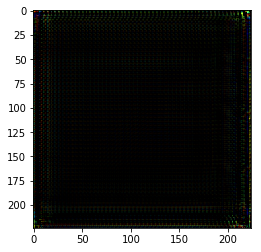

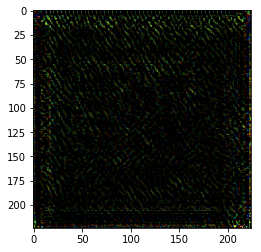

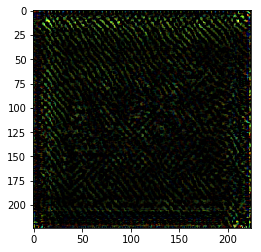

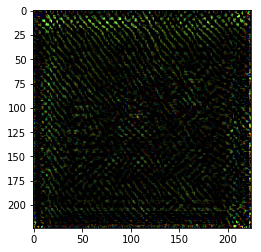

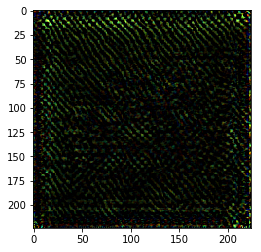

In [31]:
model = models.vgg19(pretrained=True)
model.eval()

all_grads = torch.zeros(1,3,224,224)

from PIL import Image
img = Image.open("elephant.jpeg")
img_t = transform(img)
img = torch.unsqueeze(img_t, 0)
img = img[:,0:3,:,:]
img.requires_grad_(True)


print (img.shape)

initial_input = torch.zeros(1,3,224,224, requires_grad=True)

RANGE=5

xvals = torch.zeros(RANGE)
yvals = torch.zeros(RANGE)

for i in range(RANGE):
    
#     initial_input = torch.zeros(1,3,224,224, requires_grad=True)
#     initial_input = img
    
#     initial_input = img
    initial_out = softmax(model(initial_input))
    
    copied = initial_out[0].clone()
    xvals[i] = torch.argmax(copied)
    copied[int(torch.argmax(copied))] = 0
    yvals[i] = torch.argmax(copied)
    
    loss = nn.MSELoss()

    target = torch.zeros(1, 1000)

    loss_val = loss(target, initial_out)

#     print (loss_val)

    loss_val.backward()

    gradient_wrt_input = initial_input.grad

#     print (gradient_wrt_input.shape)

    input_vector_gradients_visualize = normalize(gradient_wrt_input[0,:,:,:])
    
    print (i , labels[int(torch.argmax(initial_out))], torch.max(all_grads), torch.max(initial_out))
    
    all_grads += gradient_wrt_input
    
    initial_input = gradient_wrt_input.clone()
    initial_input.requires_grad_(True)
    
#     img = img.clone() + gradient_wrt_input.clone()
#     img.requires_grad_(True)
    
    if (i%1 == 0):
        plt.figure()
        plt.imshow( 10000000*gradient_wrt_input[0,:,:,:].permute(1, 2, 0))
    

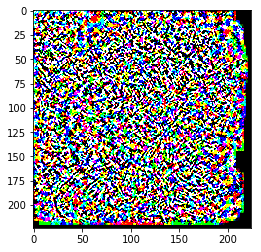

In [189]:
all_grads = all_grads[0,:,:,:]
# print (all_grads)
plt.imshow( (all_grads*4000).permute(1, 2, 0))

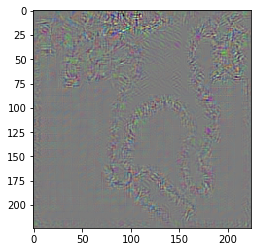

In [167]:
model = models.alexnet(pretrained=True)
model.eval()

from PIL import Image
img = Image.open("curses.png")
img_t = transform(img)
img = torch.unsqueeze(img_t, 0)
img = img[:,0:3,:,:]
img.requires_grad_(True)

initial_out = softmax(model(img))
loss = nn.MSELoss()
target = torch.rand(1, 1000)
loss_val = loss(target, initial_out)
loss_val.backward()
gradient_wrt_input = img.grad

input_vector_gradients_visualize = normalize(gradient_wrt_input[0,:,:,:])
plt.figure()
plt.imshow(input_vector_gradients_visualize.permute(1, 2, 0))